Text(0.5, 0.98, 'Non-Hydrostatic Model')

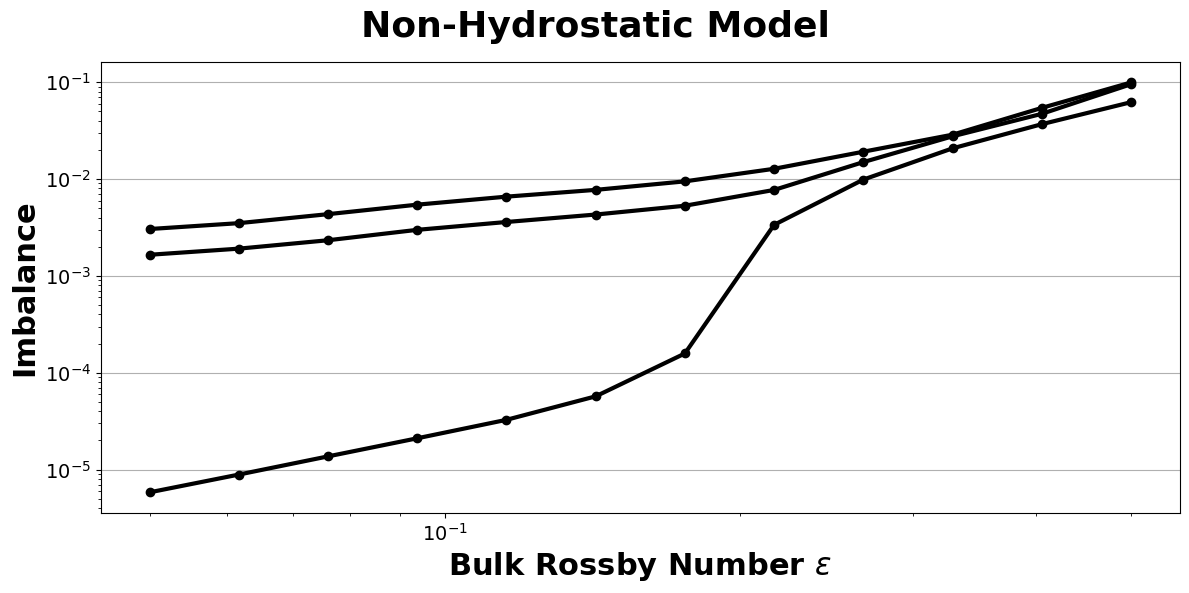

In [6]:
import fridom.nonhydro as nh
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from labellines import labelLines
from matplotlib.lines import Line2D

import obta_paper

# ================================================================
#  Plot
# ================================================================
fig, axs = plt.subplots(1, 1, figsize=(12,6), tight_layout=True)

ds = xr.load_dataset("../data/closure_ramping_nh.nc", decode_timedelta=False)

colors = plt.cm.viridis_r(np.linspace(0.2, 0.8, len(ds.closure_ramping)))[::-1]


# OB
ds.sel({"closure_ramping":"No Viscosity"}).imbalance.plot(
            ax=axs, marker="o", color="black", lw=3,
        )

ds.sel({"closure_ramping":"Constant Viscosity"}).imbalance.plot(
            ax=axs, marker="o", color="black", lw=3)

ds.sel({"closure_ramping":"Ramping Viscosity"}).imbalance.plot(
            ax=axs, marker="o", color="black", lw=3)

# # # create a custom legend
# custom_lines = [Line2D([0], [0], color=colors[1], lw=4),
#                 Line2D([0], [0], color="black", lw=4, marker="s")]
# leg = axs[0].legend(custom_lines, ["OBTA", "OB"],
#                     frameon=True,
#                     prop={"size":"xx-large"})
# leg.get_frame().set_linewidth(0)
# leg.get_frame().set_facecolor("white")

axs.tick_params(labelsize=14)
axs.set_xscale("log")
axs.set_yscale("log")
axs.grid(axis="y")
axs.set_xlabel(r"Bulk Rossby Number $\epsilon$", fontsize=22, fontweight="bold")
axs.set_ylabel("Imbalance", fontsize=22, fontweight="bold")
axs.set_title("")

plt.suptitle("Non-Hydrostatic Model", fontsize=26, fontweight="bold")
# plt.savefig("../figures/rossby_number_nh.png", dpi=200)